https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Example 1 

In [3]:
sns.set()
df = pd.read_csv('fmri.csv')
#fmri = sns.load_dataset("fmri")  -> alternative of pd.read_csv 

In [4]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


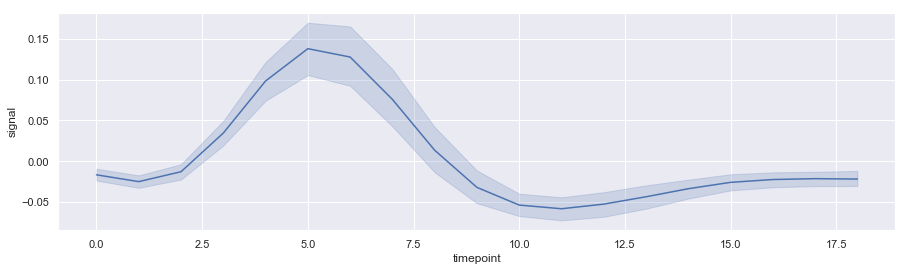

In [68]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='timepoint',y='signal',data=df);
# shadow on the line shows error bands

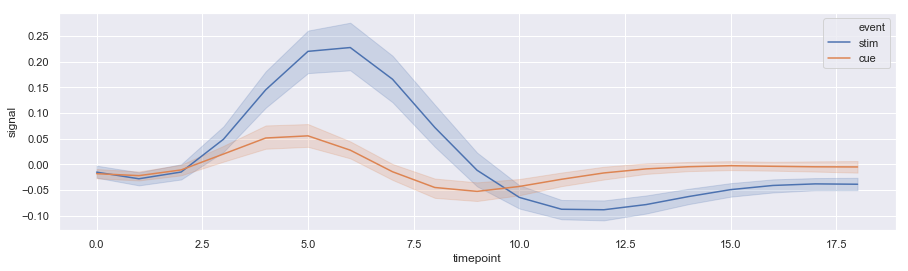

In [69]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='timepoint',y='signal',hue='event',data=df);
# with hue

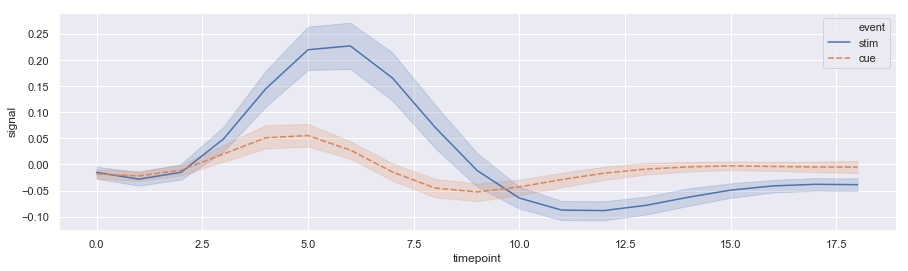

In [70]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='timepoint',y='signal',style='event',hue='event',data=df);
# with style ,  distinguish line style

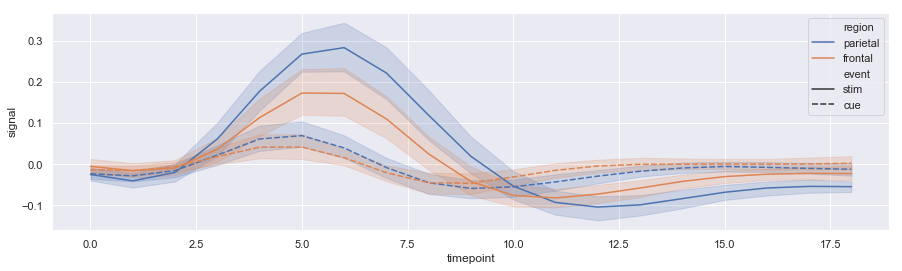

In [71]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='timepoint',y='signal',style='event',hue='region',data=df);

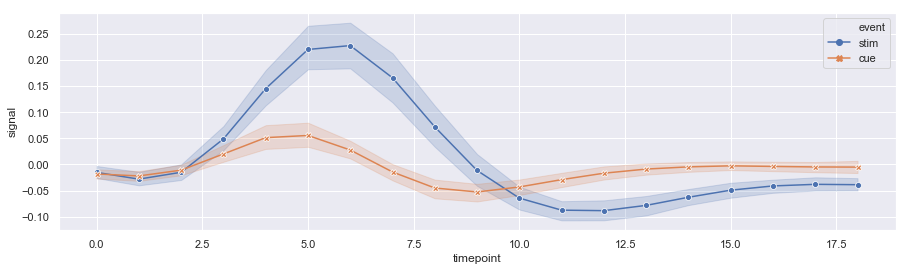

In [73]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='timepoint',y='signal',style='event',hue='event',dashes=False,markers=True,data=df);
#Use markers instead of the dashes to identify groups

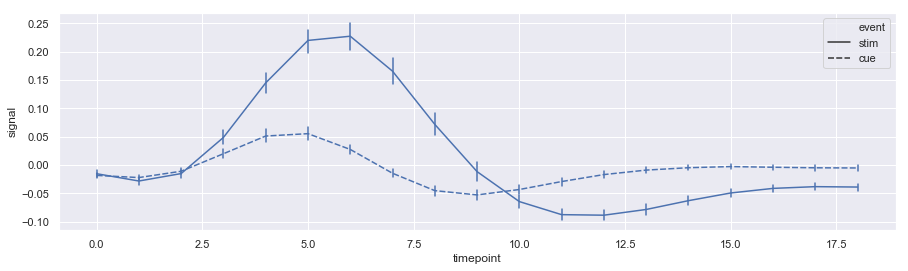

In [74]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='timepoint',y='signal',style='event',ci=68,err_style='bars',data=df);
#shows error bars instead of error bands and plot standard error

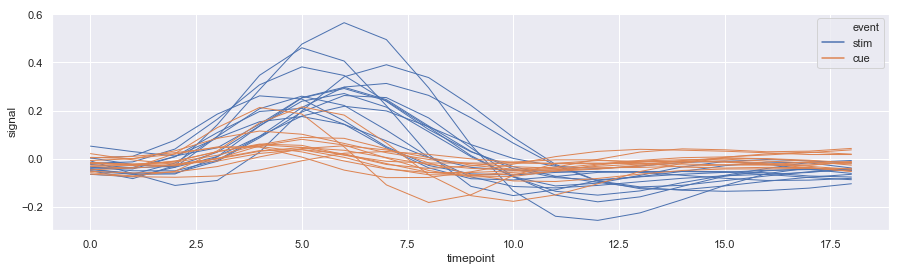

In [76]:
plt.subplots(figsize=(15,4))
sns.lineplot(x="timepoint", y="signal", hue="event",
                  units="subject", estimator=None,lw=1,
                  data=fmri.query("region == 'parietal'"));
    
#lw = linewidth 
#units = sampling units 

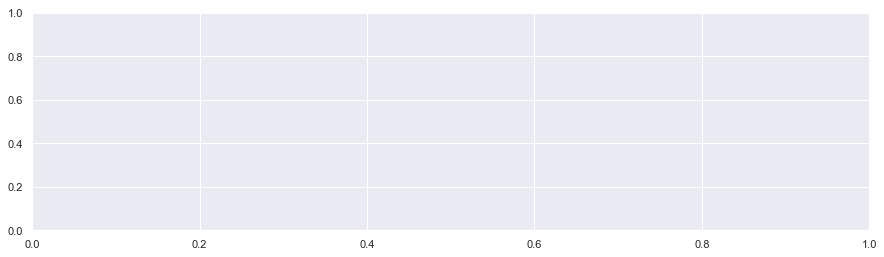

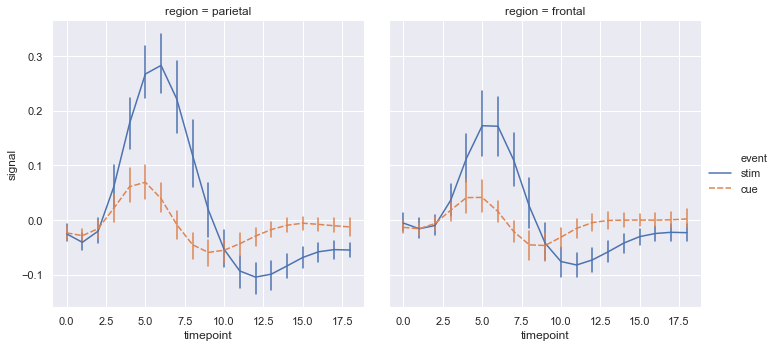

In [77]:
plt.subplots(figsize=(15,4))
sns.relplot(x="timepoint", y="signal", col='region',style='event',hue="event",
            err_style='bars',data=df,kind='line');
#Facegrid with lineplot 

## Example 2

In [44]:
#flights = pd.read_csv('flights.csv')
flights = sns.load_dataset('flights')  # don't need to download it 
sns.set()

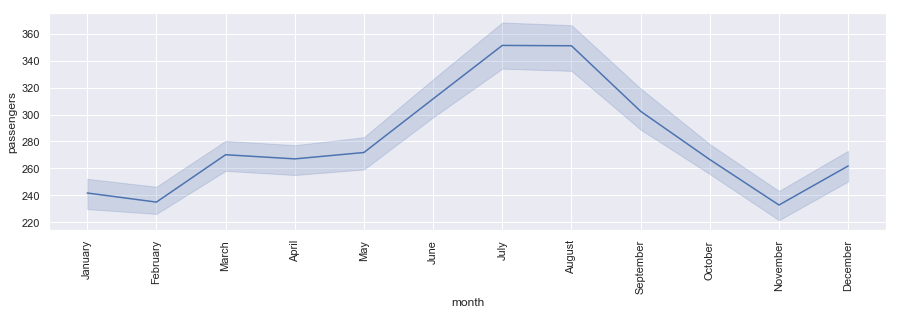

In [78]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='month',y='passengers',data=flights,ci=30)
# There is a issue if you use pd.read_csv('flights.csv'). Because if you are plotting line x-axis is alpabetically ordered
plt.xticks(rotation=90);

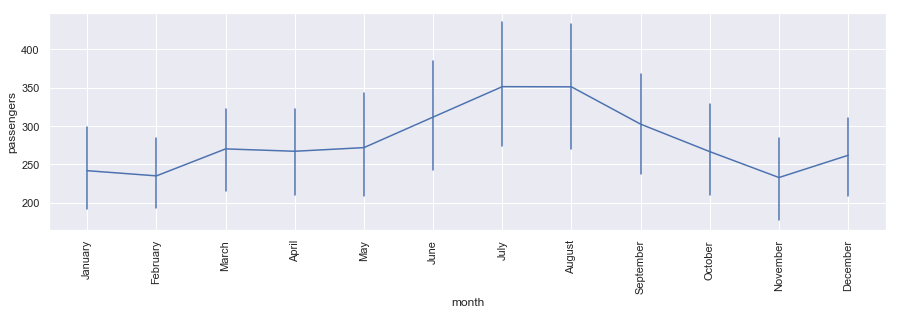

In [79]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='month',y='passengers',data=flights,err_style='bars')
plt.xticks(rotation=90);

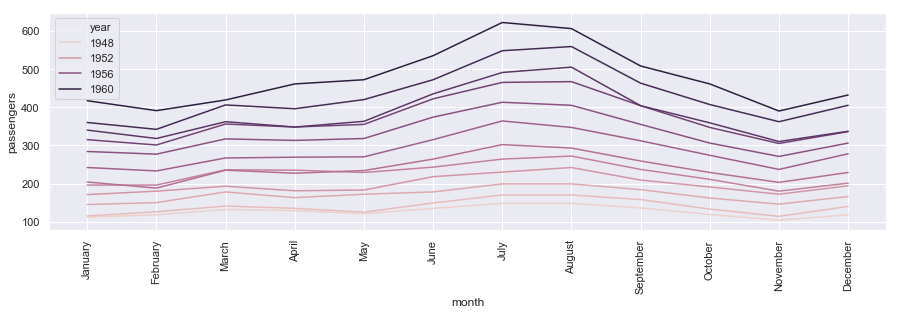

In [80]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='month',y='passengers',hue='year',data=flights)
plt.xticks(rotation=90);

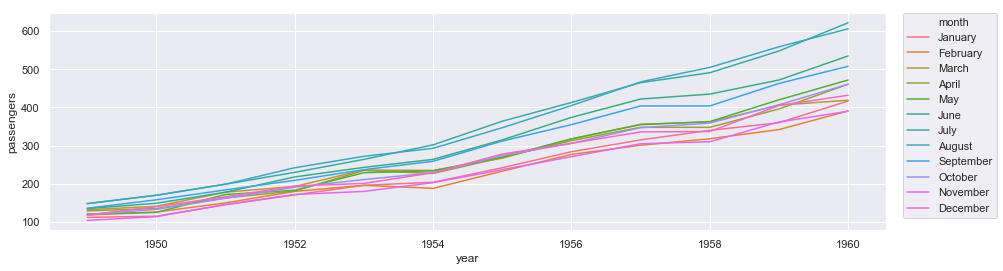

In [90]:
plt.subplots(figsize=(15,4))
sns.lineplot(x='year',y='passengers',hue='month',data=flights);
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);
# change the position of legend

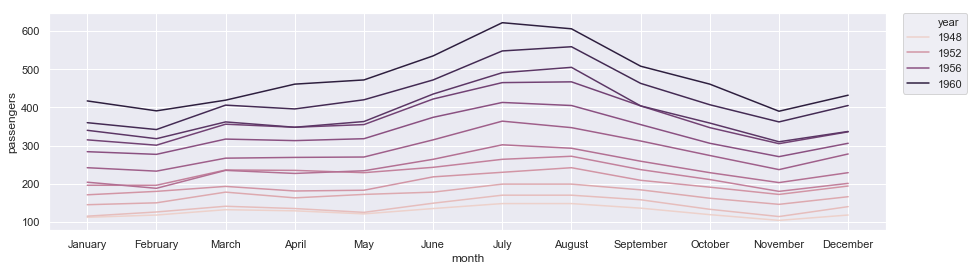

In [94]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=flights, x="month", y="passengers", hue="year")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

In [103]:
#change the datatype 
#https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior
from datetime import datetime
year = 2020
month = "March"

s = f"{year} {month} 1"
d = datetime.strptime(s, "%Y %B %d")
d.strftime("%Y-%m-%d")

'2020-03-01'

In [115]:
# we'll change the type of data in datetime library

def datetime_find(row):
    year = row['year']
    month = row['month']
    s = f"{year} {month} 1"
    d=datetime.strptime(s, "%Y %B %d")
    return d.strftime("%Y-%m-%d")
row = {'year':1949,'month':'April'}

In [116]:
datetime_find(row)

'1949-04-01'

In [120]:
df = pd.read_csv('flights.csv')
# we have to necessarily need pandas csv file
df['date'] = df.apply(datetime_find,axis=1)

In [122]:
df.info() #  but it's still wrong type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
year          144 non-null int64
month         144 non-null object
passengers    144 non-null int64
date          144 non-null object
dtypes: int64(2), object(2)
memory usage: 4.6+ KB


In [124]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
year          144 non-null int64
month         144 non-null object
passengers    144 non-null int64
date          144 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ KB


In [134]:
df_new = df[['date','passengers']]

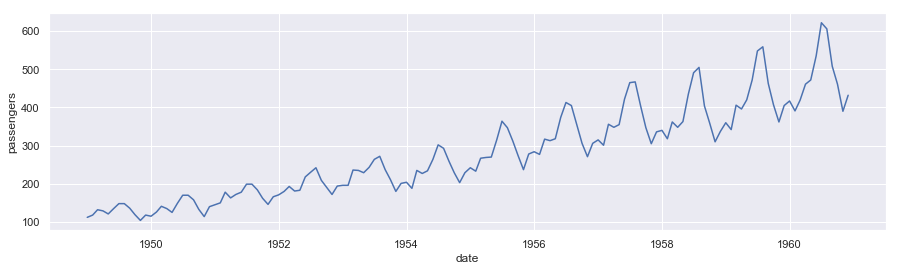

In [135]:
from pandas.plotting import register_matplotlib_converters
# Register Pandas Formatters and Converters with matplotlib.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.register_matplotlib_converters.html
register_matplotlib_converters()
plt.subplots(figsize=(15,4))
sns.lineplot(data=df_new,x='date',y='passengers');